In [1]:
import os, fnmatch
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.metrics import roc_auc_score
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import metrics
import itertools


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy
import pandas
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df = pd.read_csv('/Users/stevencocke/Downloads/final_project.csv')  

In [3]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [4]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [5]:
import pandas as pd
import numpy as np

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1854a278>,
      dtype=object)

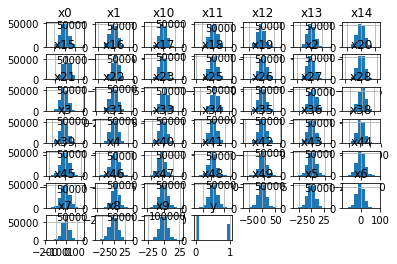

In [6]:
df.hist()


Preview of data with null values:
xxxxxxxxxxxxx
           x0        x1        x2         x3         x4         x5         x6  \
29  -0.321393 -5.910640  6.243552 -12.936755   4.847573  11.270850   9.077655   
48  -0.927155 -7.290313  6.049319  -3.980340 -12.851658   2.197959   8.795256   
126  0.327565 -0.544186 -6.928746  -5.659393  -3.423373  -1.850306 -10.073876   

            x7         x8        x9 ...        x41       x42       x43  \
29  -33.353069  -5.373054  3.055698 ...  45.536116  5.295248       NaN   
48         NaN   1.399448 -0.199977 ...  13.029896 -2.101706 -0.150942   
126  -8.432450  24.492095 -5.653426 ...  16.366108 -9.924910 -0.144486   

          x44       x45        x46       x47       x48       x49  y  
29  -7.541517  0.202396  -7.226681 -2.508254 -3.089376 -0.269219  0  
48  -1.161704 -0.600030 -21.211359  7.546942 -0.504204 -4.783417  0  
126 -1.511031 -0.057357 -69.130267  1.264002  0.317753  6.095717  0  

[3 rows x 51 columns]


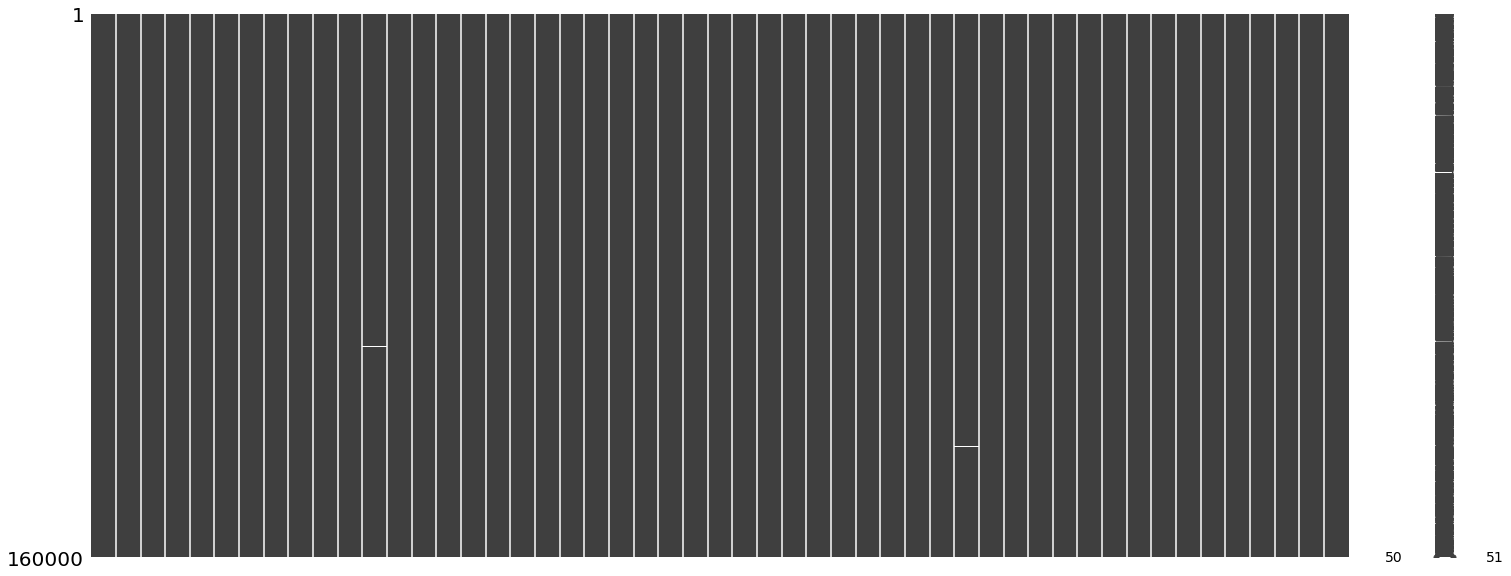

In [7]:
# generate preview of entries with null values
if len(df[df.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()

In [8]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


## mirror tanvi's code to prep df for classification functions - should have same df names now

In [9]:
data_wrk_df = df.copy()

data_wrk_df['x32_new']=data_wrk_df['x32'].replace(r'%','', regex=True)
data_wrk_df['x37_new']=data_wrk_df['x37'].replace(r'\$','', regex=True)

data_wrk_df.drop(['x32','x37'],axis=1,inplace=True)

In [10]:
data_wrk_df['x37_new']=data_wrk_df['x37_new'].astype(float)
data_wrk_df['x32_new']=data_wrk_df['x32_new'].astype(float)

In [11]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars_wrk = list()
# List to hold names of numerical variables
numericalVars_wrk = list()

for colName in data_wrk_df.columns:
    if data_wrk_df[colName].dtype == np.int64:
        numericalVars_wrk.append(colName)
    elif data_wrk_df[colName].dtype == np.object:
        categoricalVars_wrk.append(colName)
    else:
        pass

In [12]:
categoricalVars_wrk

['x24', 'x29', 'x30']

In [13]:
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars_wrk:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(data_wrk_df[categoricalVar], prefix=categoricalVar, drop_first=True)
    data_wrk_df = pd.concat((data_wrk_df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
data_wrk_df.drop(categoricalVars_wrk, inplace=True, axis=1)


In [14]:
data_wrk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 65 columns):
x0               159974 non-null float64
x1               159975 non-null float64
x2               159962 non-null float64
x3               159963 non-null float64
x4               159974 non-null float64
x5               159963 non-null float64
x6               159974 non-null float64
x7               159973 non-null float64
x8               159979 non-null float64
x9               159970 non-null float64
x10              159957 non-null float64
x11              159970 non-null float64
x12              159964 non-null float64
x13              159969 non-null float64
x14              159966 non-null float64
x15              159965 non-null float64
x16              159974 non-null float64
x17              159973 non-null float64
x18              159960 non-null float64
x19              159965 non-null float64
x20              159962 non-null float64
x21              159971 non-

In [15]:
#drop na values
data_wrk_dropna_df=data_wrk_df.copy()
data_wrk_dropna_df.dropna( axis=0, how='any', thresh=None, subset=None, inplace=True)
data_wrk_dropna_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158480 entries, 0 to 159999
Data columns (total 65 columns):
x0               158480 non-null float64
x1               158480 non-null float64
x2               158480 non-null float64
x3               158480 non-null float64
x4               158480 non-null float64
x5               158480 non-null float64
x6               158480 non-null float64
x7               158480 non-null float64
x8               158480 non-null float64
x9               158480 non-null float64
x10              158480 non-null float64
x11              158480 non-null float64
x12              158480 non-null float64
x13              158480 non-null float64
x14              158480 non-null float64
x15              158480 non-null float64
x16              158480 non-null float64
x17              158480 non-null float64
x18              158480 non-null float64
x19              158480 non-null float64
x20              158480 non-null float64
x21              158480 non-

### Prepare the Test and Train Datasets

-  80/20 Training and Testing Split : we have splited the data into 80% to train and 20% to test so that we can train and find out the optimal classifier for our project. We have also created a cross validation instance for future cross validate when we perform gridsearch to find the best set of hyperparameters for each algorithm.

#### Shuffle Split
  The Shuffle Split technique is a random permutation cross-validator. It returns the indices to be used for splitting the data into training and test sets.


In [16]:
validation = data_wrk_dropna_df.sample(frac=.2, replace=False, weights=None, random_state=999, axis=0)
validation.shape


(31696, 65)

In [17]:
data_wrk_dropna_df.shape

(158480, 65)

In [18]:
data_wrk_dropna_df.drop(axis = 0, index = list(validation.index.values), inplace = True)
data_wrk_dropna_df.shape

(126784, 65)

In [19]:
y_rf_model = data_wrk_dropna_df['y']

In [20]:
X_rf_model = data_wrk_dropna_df.iloc[:, 0:50]

In [21]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
# set Cross Validation Object with 10 folds and split 80/20 train to test data
cv_rf = ShuffleSplit(n_splits = 10, test_size=0.20, random_state=0)
# Create the train and test data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf_model, y_rf_model, test_size=0.2)

In [22]:
metricsObj = pd.DataFrame(columns=['Modelname', 'MSE', 'MAE', 'RMSE', 'Variance-Score'])
print(metricsObj)

Empty DataFrame
Columns: [Modelname, MSE, MAE, RMSE, Variance-Score]
Index: []


## use professor drew's functions to help evaluate estimators

#### Function Definitions
- Credit: https://github.com/jakemdrew/EducationDataNC/blob/master/2017/Models/2017ComparingSegregatedHighSchoolCampuses.ipynb

In [23]:
results = []

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv, model):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X, y, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    
    results.append({'Model': model, 'Accuracy': Accavg, 'Precision': Preavg, 'Recall': Recavg})

    return scoresResults

def EvaluateClassifierEstimator2(classifierEstimator, X, y, cv):
    
    #Perform cross validation 
    from sklearn.model_selection import cross_val_predict
    predictions = cross_val_predict(classifierEstimator, X, y, cv=cv)
    
    #model evaluation 
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    #pass true test set values and predictions to classification_report
    classReport = classification_report(Y,predictions)
    confMat = confusion_matrix(Y,predictions)
    acc = accuracy_score(Y,predictions)
    
    print (classReport)
    print (confMat)
    print (acc)

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Position label')
    plt.xlabel('Predicted Position label')

In [25]:
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.figure(figsize=(8,6))
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.savefig(title)
    plt.show()

### Regressor Models

In [26]:
# credit: prof. jake drew sample notebooks
#Function declaration
def print_metrics(model, model_name):
    y_pred = model.predict(X_test)
    print('R2 Score:', metrics.r2_score(y_test, y_pred))
    print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    metricsObj1 = metricsObj.append({'Modelname': model_name,
                                     'MSE': metrics.mean_squared_error(y_test, y_pred),
                                     'MAE': metrics.mean_absolute_error(y_test, y_pred),
                                     'RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 
                                'Variance-Score': model.score(X_test, y_test)}, ignore_index=True)
    return metricsObj1


In [27]:
def plot_residuals(model, xmin, xmax):
    # plot for residual error
    opacity = 1.0
    size = 10
    
    ## plotting residual errors in training data
    plt.figure(figsize=(10, 6))
    plt.scatter(model.predict(X_train),
                model.predict(X_train)-y_train,
                color="blue",
                s=size, label='Training data', alpha=opacity)
    plt.hlines(y=0, xmin=0, xmax=10, linewidth=1)
    #plt.xscale('log')
    plt.xlim(xmin, xmax)
    plt.show()

    ## plotting residual errors in test data
    plt.figure(figsize=(10, 6))
    plt.scatter(model.predict(X_test),
                model.predict(X_test)-y_test,
                color="red", s=size,
                label='Test data', alpha=opacity)
    plt.hlines(y=0, xmin=0, xmax=10, linewidth=1)
    #plt.xscale('log')
    plt.xlim(xmin, xmax)
    plt.show()

    ## plotting residual errors comparing train to test
    plt.figure(figsize=(10, 6))
    plt.scatter(model.predict(X_train),
                model.predict(X_train)-y_train,
                color="blue",
                s=size,
                label='Training data', alpha=opacity)
    plt.scatter(model.predict(X_test),
                model.predict(X_test)-y_test,
                color="red",
                s=size,
                label='Test data', alpha=opacity)
    plt.hlines(y=0, xmin=0, xmax=10, linewidth=1)
    #plt.xscale('log')
    plt.xlim(xmin, xmax)
    plt.legend(loc='upper right')
    plt.xlabel('Independent or x varaibales')
    plt.ylabel('Residuals')
    plt.show()


In [28]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color="#cc2529", linewidth=1)

### Random Forest Regression

In [29]:
# credit: prof. jake drew sample notebooks
#Function declaration
def print_metrics(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    print('R2 Score:', metrics.r2_score(y_test, y_pred))
    print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    metricsObj1 = metricsObj.append({'Modelname': model_name,
                                     'MSE': metrics.mean_squared_error(y_test, y_pred),
                                     'MAE': metrics.mean_absolute_error(y_test, y_pred),
                                     'RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 
                                'Variance-Score': model.score(X_test, y_test)}, ignore_index=True)
    return metricsObj1


In [30]:
def plot_residuals(model, xmin, xmax):
    # plot for residual error
    opacity = 1.0
    size = 10
    
    ## plotting residual errors in training data
    plt.figure(figsize=(10, 6))
    plt.scatter(model.predict(X_train),
                model.predict(X_train)-y_train,
                color="blue",
                s=size, label='Training data', alpha=opacity)
    plt.hlines(y=0, xmin=0, xmax=10, linewidth=1)
    #plt.xscale('log')
    plt.xlim(xmin, xmax)
    plt.show()

    ## plotting residual errors in test data
    plt.figure(figsize=(10, 6))
    plt.scatter(model.predict(X_test),
                model.predict(X_test)-y_test,
                color="red", s=size,
                label='Test data', alpha=opacity)
    plt.hlines(y=0, xmin=0, xmax=10, linewidth=1)
    #plt.xscale('log')
    plt.xlim(xmin, xmax)
    plt.show()

    ## plotting residual errors comparing train to test
    plt.figure(figsize=(10, 6))
    plt.scatter(model.predict(X_train),
                model.predict(X_train)-y_train,
                color="blue",
                s=size,
                label='Training data', alpha=opacity)
    plt.scatter(model.predict(X_test),
                model.predict(X_test)-y_test,
                color="red",
                s=size,
                label='Test data', alpha=opacity)
    plt.hlines(y=0, xmin=0, xmax=10, linewidth=1)
    #plt.xscale('log')
    plt.xlim(xmin, xmax)
    plt.legend(loc='upper right')
    plt.xlabel('Independent or x varaibales')
    plt.ylabel('Residuals')
    plt.show()


In [31]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color="#cc2529", linewidth=1)

In [32]:
#error - need to convert categorical variables to indicator variables - I didn't notice there were any categorical at first

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=99, n_jobs=-1)
rfm = rf.fit(X_train_rf, y_train_rf)

In [34]:
y_pred_rf = rfm.predict(X_test_rf)

In [35]:
print("Model Performance (Random Forest Classifier")
metricsObj = print_metrics(rfm, 'Random Forest Classifier', X_test_rf, y_test_rf)


Model Performance (Random Forest Classifier
R2 Score: 1.0
Explained Variance Score: 1.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_rf, y_pred_rf)
print(confusion_matrix)

[[15273     0]
 [    0 10084]]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15273
           1       1.00      1.00      1.00     10084

   micro avg       1.00      1.00      1.00     25357
   macro avg       1.00      1.00      1.00     25357
weighted avg       1.00      1.00      1.00     25357



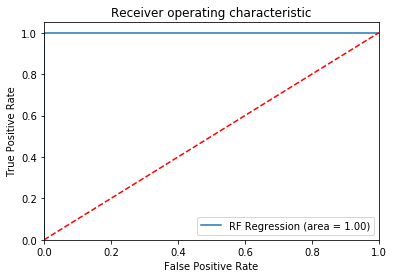

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_rf = roc_auc_score(y_test_rf, rfm.predict(X_test_rf))
fpr, tpr, thresholds = roc_curve(y_test_rf, rfm.predict_proba(X_test_rf)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF Regression (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

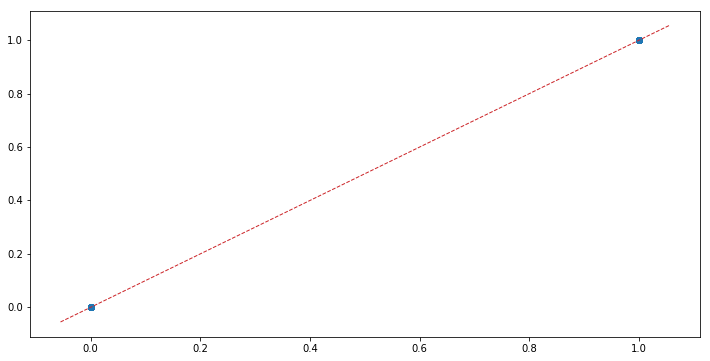

In [39]:
rf_df = pd.DataFrame({'Actual': y_test_rf, 'Predicted': y_pred_rf})
rf_df.reset_index(inplace=True, drop=True)

# actual vs. prediction value plot
plt.figure(figsize=(12, 6))
plt.scatter(rf_df['Actual'], rf_df['Predicted'])
abline(1,0)
#plt.ylim(0.1, 10)
#plt.yscale('log')
#plt.xlim(0.1, 10)
#plt.xscale('log')
#plt.xlabel('Actual Volume')
#plt.ylabel('Predicted Volume')
plt.savefig('randomforest_scatter_actualvspredict_logT.png')
plt.show()

In [40]:
plot_residuals(rfm, 0.1, 10)
print(metricsObj)

NameError: name 'X_train' is not defined

<Figure size 720x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, '-r', label = "True y")
plt.plot(y_pred_rf, '-b', label = "Predicted y - Random Forest")
plt.legend()
#plt.savefig('randomforest_linecurve_actualvspredict.png')
plt.show()

In [ ]:
#actualVsPredict value plot
df1 = rf_df.head(40)
df1.plot(kind='bar',figsize=(12,6))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')